## CNN Models - LeNet5

### fashion mnist - 실습

In [2]:
import tensorflow as tf

# 데이터 준비
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

# 텐서플로우의 원핫 인코딩 함수 ( 또는 판다스의 get_dummies)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [3]:
# 모델 생성
X = tf.keras.Input(shape=[28,28,1])
H = tf.keras.layers.Conv2D(3,5,activation="swish") ( X)
H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(3,5,activation="swish") ( X)
H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Flatten() (H)
H = tf.keras.layers.Dense(84, activation="swish")(H)
Y = tf.keras.layers.Dense(10,activation="softmax") (H)

model = tf.keras.Model(X,Y)
model.compile(loss="categorical_crossentropy", metrics="accuracy")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 3)         78        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 3)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 432)               0         
                                                                 
 dense (Dense)               (None, 84)                36372     
                                                                 
 dense_1 (Dense)             (None, 10)                850       
                                                             

In [ ]:
# 모델 학습
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

### LeNet5 + fashion MNIST

In [ ]:
# 모델 생성
# BatchNormalization : Layer사이에 중간 결과 데이터들을 표준정규화하는 계층
# 중간 레이어가 들어가면 가중치가 붙어서 결과가 튈 수 있다. 정확도를 높이기 위해 한번 값이 계산된 후 정규화를 해준다.
# Convolution 후 activation 하기전 normalization 하는 것이 좋다.
X = tf.keras.Input(shape=[28,28,1])

H = tf.keras.layers.Conv2D(6,5,padding='same')(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16,5)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)

H = tf.keras.layers.Dense(120)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dense(84)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

In [ ]:
# 모델 학습
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

In [19]:
# 모델 평가 loss: 0.0777 - accuracy: 0.9703 - val_loss: 0.4561 - val_accuracy: 0.8917
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4448 - accuracy: 0.8948


[0.4448123574256897, 0.8948000073432922]

### LeNet5 + cifar10 + dropout

In [28]:
import tensorflow as tf
# 데이터 준비
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# normalization
x_train = x_train/ 255
x_test = x_test / 255

# 원핫인코딩
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)



(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


In [29]:
# 모델 생성
# Dorpout : 지정된 확률의 개수만큼 노드를 랜덤하게 제외하고 학습을 진행 
# -> overfitting 방지, 성능향상, 앙상블 효과
# -> 데이터가 충분하다면 최대한 높게 줄수록 좋다(0.4~0.6)
X = tf.keras.Input(shape=[32, 32, 3])

H = tf.keras.layers.Conv2D(6, 5)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
# H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(6, 5, strides=2, padding="same")(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Conv2D(16, 5)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
# H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(16, 5, strides=2, padding="same")(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Flatten()(H)

H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Dense(120)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dense(84)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="categorical_crossentropy", metrics="accuracy")
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 batch_normalization_21 (Bat  (None, 28, 28, 6)        24        
 chNormalization)                                                
                                                                 
 activation_19 (Activation)  (None, 28, 28, 6)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 6)         906       
                                                                 
 batch_normalization_22 (Bat  (None, 14, 14, 6)        24        
 chNormalization)                                          

In [ ]:
# 모델 학습
# EarlyStopping : 오버 피팅이 일어나면 멈추고 싶다! 가장 그럴듯한 모델을 빼서 쓰고 싶다.
es = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.fit(x_train, y_train, epochs=100000, batch_size=128, validation_split=0.1, callbacks=[es])

#### Data Augmentation
- 256x256 ,이미지, 10,000장을 학습용 이미지로 제공

- 만장이라는 데이터는 작다.
만장을 뻥튀기 하자.

- 256x256 px을 224x224로 잘라서 학습으로 사용. 한 픽셀씩 옮겨서 자르면 아까와 다른 이미지. 왜냐면 컴퓨터는 숫자로 이해하기 때문에.

In [31]:
# ImageDataGenerator : 기존 이미지를 변형해서 새로운 이미지를 생성해주는 도구
# -> overfitting 방지
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    rotation_range = 0.1
)

train_ds = datagen.flow(x_train[:40000], y_train[:40000], batch_size=128)
valid_ds = tf.data.Dataset.from_tensor_slices((x_train[40000:], y_train[40000:])).batch(128)

(128, 32, 32, 3) (128, 10)


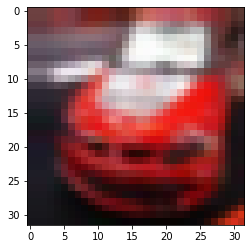

In [32]:
x,y = next(iter(train_ds))
print(x.shape, y.shape)

import matplotlib.pyplot as plt
plt.imshow(x[0])
plt.show()

In [ ]:
# 모델 학습
# 먼저 이미지로 학습한 다음, Augmentation을 걸어서 학습을 시킴. 
# 처음부터 Augmentation으로 하면 시간이 너무 많이 걸린다.

# model.fit(train_ds, validation_data=valid_ds, epochs=10)

es = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.fit(x_train, y_train, epochs=100000, batch_size=128, validation_split=0.1, callbacks=[es])

In [ ]:
# 모델 평가
#  loss: 0.8446 - accuracy: 0.7041 [0.8445699214935303, 0.7041000127792358]
model.evaluate(x_test, y_test)

## CNN Models - VGGNET
- 3x3 convolution, stride 1 활용
- 간단한 구조로 좋은 성과, 파라미터 개수가 많음

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train = x_train / 255
x_test = x_test / 255

# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [ ]:
def vgg_block(n_filters, n_layers, net):
    for i in range(n_layers):
        net = tf.keras.layers.Conv2D(n_filters, 3, padding="same")(net)
        net = tf.keras.layers.BatchNormalization()(net)
        net = tf.keras.layers.Activation('swish')(net)
    # net = tf.keras.layers.MaxPool2D()(net)
    net = tf.keras.layers.Conv2D(n_filters, 3, strides=2, padding="same")(net)
    return net

### VGG 13

In [ ]:
# 모델 생성
X = tf.keras.Input(shape=[32, 32, 3])

H = vgg_block(64, 2, X)
H = vgg_block(128, 2, H)
H = vgg_block(256, 2, H)
H = vgg_block(512, 2, H)
H = vgg_block(512, 2, H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(4096)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(4096)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(1000)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
model.summary()

In [ ]:
# 모델 학습
es = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(x_train, y_train, epochs=1000000, validation_split=0.1, callbacks=[es])

In [ ]:
# 모델 평가
model.evaluate(x_test, y_test)

### VGG 19

In [ ]:
# 모델 생성
X = tf.keras.Input(shape=[32, 32, 3])

H = vgg_block(64, 2, X)
H = vgg_block(128, 2, H)
H = vgg_block(256, 4, H)
H = tf.keras.layers.Dropout(0.5)(H)
H = vgg_block(512, 4, H)
H = vgg_block(512, 4, H)
H = tf.keras.layers.Dropout(0.5)(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(4096)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Dense(4096)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Dense(1000)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
model.summary()

In [ ]:
# 모델 학습
es = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(x_train, y_train, epochs=1000000, validation_split=0.1, callbacks=[es])

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    rotation_range=0.1,
)
train_ds = datagen.flow(x_train[:40000], y_train[:40000], batch_size=128)
valid_ds = tf.data.Dataset.from_tensor_slices((x_train[40000:], y_train[40000:])).batch(128)

In [ ]:
# 모델 학습
es = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
result = model.fit(train_ds, validation_data=valid_ds, epochs=100000, callbacks=[es])

In [ ]:
# 모델 평가 loss: 0.6141 - accuracy: 0.8112 [0.6141185164451599, 0.8112000226974487]
model.evaluate(x_test, y_test)

In [ ]:
import pandas as pd
pd.DataFrame(result.history)

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(result.history['loss'])
# plt.plot(result.history['val_loss'])
plt.plot([10, 5, 3, 2, 1])
plt.plot([7, 5, 4, 3, 4])
plt.legend(['loss', 'val_loss'])

In [ ]:
# 모델 저장
model.save("vgg_model.h5", include_optimizer=True)

In [ ]:
# 저장된 모델 로드
vgg = tf.keras.models.load_model('vgg_model.h5')
vgg.evaluate(x_test, y_test)

## CNN Models - ResNet

### ResNet 34

In [ ]:
def residual_block_2(n_filter, x):
    h = tf.keras.layers.Conv2D(n_filter, 3, padding="same")(x)
    h = tf.keras.layers.BatchNormalization()(h)
    h = tf.keras.layers.Activation("swish")(h)

    h = tf.keras.layers.Conv2D(n_filter, 3, padding="same")(h)
    h = tf.keras.layers.BatchNormalization()(h)

    # x.shape (8, 8, 64)
    if x.shape[-1] != n_filter:
        x = tf.keras.layers.Conv2D(n_filter, 1, padding="same")(x)

    h = tf.keras.layers.Add()([x, h])
    h = tf.keras.layers.Activation("swish")(h)
    return h


In [ ]:
X = tf.keras.Input(shape=[32, 32, 3])
H = tf.keras.layers.Conv2D(64, 5, padding="same")(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
H = tf.keras.layers.MaxPool2D()(H)

for i in range(3):
    H = residual_block_2(64, H)
H = tf.keras.layers.MaxPool2D()(H)

for i in range(4):
    H = residual_block_2(128, H)
H = tf.keras.layers.MaxPool2D()(H)

for i in range(6):
    H = residual_block_2(256, H)
H = tf.keras.layers.MaxPool2D()(H)

for i in range(3):
    H = residual_block_2(512, H)
H = tf.keras.layers.AvgPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(1000)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
model.summary()

In [ ]:
# 모델 학습 
es = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.fit(x_train, y_train, epochs=1000000, validation_split=0.1, callbacks=[es])

In [ ]:
# 모델 평가  loss: 0.8578 - accuracy: 0.7177 [0.8577784299850464, 0.7177000045776367]
model.evaluate(x_test, y_test)

### ResNet 152

In [ ]:
def residual_block_3(n_filter, x):
    h = tf.keras.layers.Conv2D(n_filter // 4, 1, padding="same")(x)
    h = tf.keras.layers.BatchNormalization()(h)
    h = tf.keras.layers.Activation("swish")(h)

    h = tf.keras.layers.Conv2D(n_filter // 4, 3, padding="same")(h)
    h = tf.keras.layers.BatchNormalization()(h)
    h = tf.keras.layers.Activation("swish")(h)

    h = tf.keras.layers.Conv2D(n_filter, 1, padding="same")(h)
    h = tf.keras.layers.BatchNormalization()(h)

    # x.shape (8, 8, 64)
    if x.shape[-1] != n_filter:
        x = tf.keras.layers.Conv2D(n_filter, 1, padding="same")(x)

    h = tf.keras.layers.Add()([x, h])
    h = tf.keras.layers.Activation("swish")(h)
    return h

In [ ]:
X = tf.keras.Input(shape=[32, 32, 3])
H = tf.keras.layers.Conv2D(64, 5, padding="same")(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
# H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(H)
H = tf.keras.layers.Dropout(0.6)(H)

for i in range(3):
    H = residual_block_3(256, H)
# H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(256, 3, strides=2, padding="same")(H)

for i in range(8):
    H = residual_block_3(512, H)
# H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(512, 3, strides=2, padding="same")(H)
H = tf.keras.layers.Dropout(0.6)(H)

for i in range(36):
    H = residual_block_3(1024, H)
# H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(1024, 3, strides=2, padding="same")(H)
H = tf.keras.layers.Dropout(0.6)(H)

for i in range(3):
    H = residual_block_3(2048, H)
# H = tf.keras.layers.AvgPool2D()(H)
H = tf.keras.layers.Conv2D(2048, 3, strides=2, padding="same")(H)

H = tf.keras.layers.Dropout(0.6)(H)
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(1000)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.Model(X, Y)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
model.summary()

In [ ]:
# 모델 학습
es = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(x_train, y_train, epochs=1000000, batch_size=128, validation_split=0.1, callbacks=[es])

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    rotation_range=0.1,
)
train_ds = datagen.flow(x_train[:40000], y_train[:40000], batch_size=128)
valid_ds = tf.data.Dataset.from_tensor_slices((x_train[40000:], y_train[40000:])).batch(128)

In [ ]:
# 모델 학습
es = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(train_ds, validation_data=valid_ds, epochs=100000, callbacks=[es])

In [ ]:
# 모델 평가 loss: 0.5395 - accuracy: 0.8311 [0.5395180583000183, 0.8310999870300293]
model.evaluate(x_test, y_test)